# Student Grade Prediction - Machine Learning Assignment 🎓

## Assignment Overview
**Course**: MSAI515 - AI
**Topic**: Classification with Logistic Regression  
**Dataset**: Student Performance Dataset (5000+ records)  
**Objective**: Build a machine learning model to predict student grades

---

## Learning Objectives
By completing this assignment, you will:
1. ✅ Perform exploratory data analysis (EDA)
2. ✅ Encode categorical and target variables
3. ✅ Select relevant features for modeling
4. ✅ Split data into training and testing sets
5. ✅ Train a Logistic Regression classifier
6. ✅ Evaluate model performance using various metrics
7. ✅ Interpret model coefficients


---

## Instructions
- Complete all sections marked with **"YOUR CODE HERE"**
- Follow the hints and guidelines provided in each section
- Run your cells to verify your code works correctly
- Answer reflection questions in markdown cells where indicated

**Good luck! 🚀**

## 1. Import Required Libraries

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

np.random.seed(42)

# Set display options
pd.set_option('display.max_columns', None)
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("✅ Libraries imported successfully!")

ModuleNotFoundError: No module named 'matplotlib'

## 2. Load and Explore the Dataset

In [ ]:
# NOTE: uncommented this and pick Students Performance Dataset.csv and metadata.xlsx
# if you're not running locally
# from google.colab import files
# uploaded = files.upload()

In [ ]:
# Load the dataset
df = pd.read_csv('Students Performance Dataset.csv')

print("Dataset Shape:", df.shape)
print("\n" + "="*80)
print("First 5 Rows:")
print("="*80)
df.head()

Dataset Shape: (5000, 23)

First 5 Rows:


,Student_ID,First_Name,Last_Name,Email,Gender,Age,Department,Attendance (%),Midterm_Score,Final_Score,Assignments_Avg,Quizzes_Avg,Participation_Score,Projects_Score,Total_Score,Grade,Study_Hours_per_Week,Extracurricular_Activities,Internet_Access_at_Home,Parent_Education_Level,Family_Income_Level,Stress_Level (1-10),Sleep_Hours_per_Night
0,S1000,Omar,Williams,student0@university.com,Female,22,Mathematics,97.36,40.61,59.61,73.69,53.17,73.4,62.84,59.8865,F,10.3,Yes,No,Master's,Medium,1,5.9
1,S1001,Maria,Brown,student1@university.com,Male,18,Business,97.71,57.27,74.00,74.23,98.23,88.0,98.23,81.9170,B,27.1,No,No,High School,Low,4,4.3
2,S1002,Ahmed,Jones,student2@university.com,Male,24,Engineering,99.52,41.84,63.85,85.85,50.00,4.7,91.22,67.7170,D,12.4,Yes,No,High School,Low,9,6.1
3,S1003,Omar,Williams,student3@university.com,Female,24,Engineering,90.38,45.65,44.44,68.10,66.27,4.2,55.48,51.6535,F,25.5,No,Yes,High School,Low,8,4.9
4,S1004,John,Smith,student4@university.com,Female,23,CS,59.41,53.13,61.77,67.66,83.98,64.3,87.43,71.4030,C,13.3,Yes,No,Master's,Medium,6,4.5


In [ ]:
def get_dataset_info(df):
  # Dataset information
  print("Dataset Information:")
  print("="*80)
  df.info()
  print("\n" + "="*80)
  print("Statistical Summary:")
  print("="*80)
  df.describe()

get_dataset_info(df)

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Student_ID                  5000 non-null   object 
 1   First_Name                  5000 non-null   object 
 2   Last_Name                   5000 non-null   object 
 3   Email                       5000 non-null   object 
 4   Gender                      5000 non-null   object 
 5   Age                         5000 non-null   int64  
 6   Department                  5000 non-null   object 
 7   Attendance (%)              5000 non-null   float64
 8   Midterm_Score               5000 non-null   float64
 9   Final_Score                 5000 non-null   float64
 10  Assignments_Avg             5000 non-null   float64
 11  Quizzes_Avg                 5000 non-null   float64
 12  Participation_Score         5000 non-null   float64
 13  Projects_Sco

In [ ]:
# Create the function for later use
def check_missing_values():
  print("Missing Values:")
  print("="*80)
  missing = df.isnull().sum()
  print(missing[missing > 0] if missing.sum() > 0 else "No missing values!")

  print("\n" + "="*80)
  print("Grade Distribution:")
  print("="*80)
  print(df['Grade'].value_counts().sort_index())

# Check for missing values
check_missing_values()

Missing Values:
Parent_Education_Level    1025
dtype: int64

Grade Distribution:
Grade
A      16
B     638
C    2307
D    1760
F     279
Name: count, dtype: int64


In [ ]:
# Load metadata to understand the features
try:
    metadata = pd.read_excel('metadata.xlsx')
    print("Metadata Information:")
    print("="*80)
    print(metadata)
except Exception as e:
    print(f"Note: Metadata file could not be loaded: {e}")
    print("Proceeding with data exploration...")

Metadata Information:
             Dataset Structure   Unnamed: 1  \
0                          NaN          NaN   
1                  Column Name    Data Type   
2                   Student_ID       String   
3                   First_Name       String   
4                    Last_Name       String   
5                        Email       String   
6                       Gender  Categorical   
7                          Age      Integer   
8                   Department       String   
9               Attendance (%)        Float   
10               Midterm_Score        Float   
11                 Final_Score        Float   
12             Assignments_Avg        Float   
13                 Quizzes_Avg        Float   
14         Participation_Score        Float   
15              Projects_Score        Float   
16                 Total_Score        Float   
17                       Grade  Categorical   
18        Study_Hours_per_Week        Float   
19  Extracurricular_Activities      Bo

In [ ]:
# As observed the provided dataset, Parent_Education_Level contains large amount of missing data (null) a
# round 20% compared to the size of given dataset.
# Dropping this large rows would reduce the dataset size and potentially introduce bias
# So, an ideal solution is to add an "Unknown" category for missing values in Parent_Education_Level

df['Parent_Education_Level'].fillna('Unknown', inplace=True)

# Check for missing values after adding Unknown category to the missing rows of Parent_Education_Level
check_missing_values()

Missing Values:
No missing values!

Grade Distribution:
Grade
A      16
B     638
C    2307
D    1760
F     279
Name: count, dtype: int64


## 3. Exploratory Data Analysis (EDA)

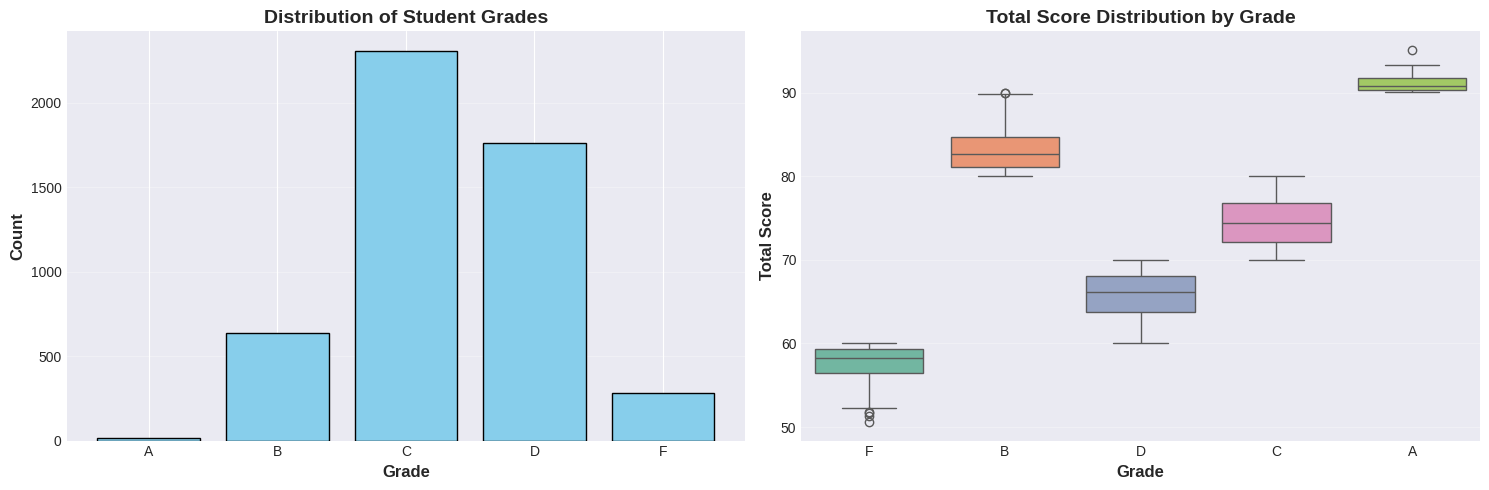

In [ ]:
# Visualize grade distribution
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Grade count plot
grade_counts = df['Grade'].value_counts().sort_index()
axes[0].bar(grade_counts.index, grade_counts.values, color='skyblue', edgecolor='black')
axes[0].set_xlabel('Grade', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Count', fontsize=12, fontweight='bold')
axes[0].set_title('Distribution of Student Grades', fontsize=14, fontweight='bold')
axes[0].grid(axis='y', alpha=0.3)

# Total score distribution by grade
sns.boxplot(data=df, x='Grade', y='Total_Score', ax=axes[1], palette='Set2')
axes[1].set_xlabel('Grade', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Total Score', fontsize=12, fontweight='bold')
axes[1].set_title('Total Score Distribution by Grade', fontsize=14, fontweight='bold')
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

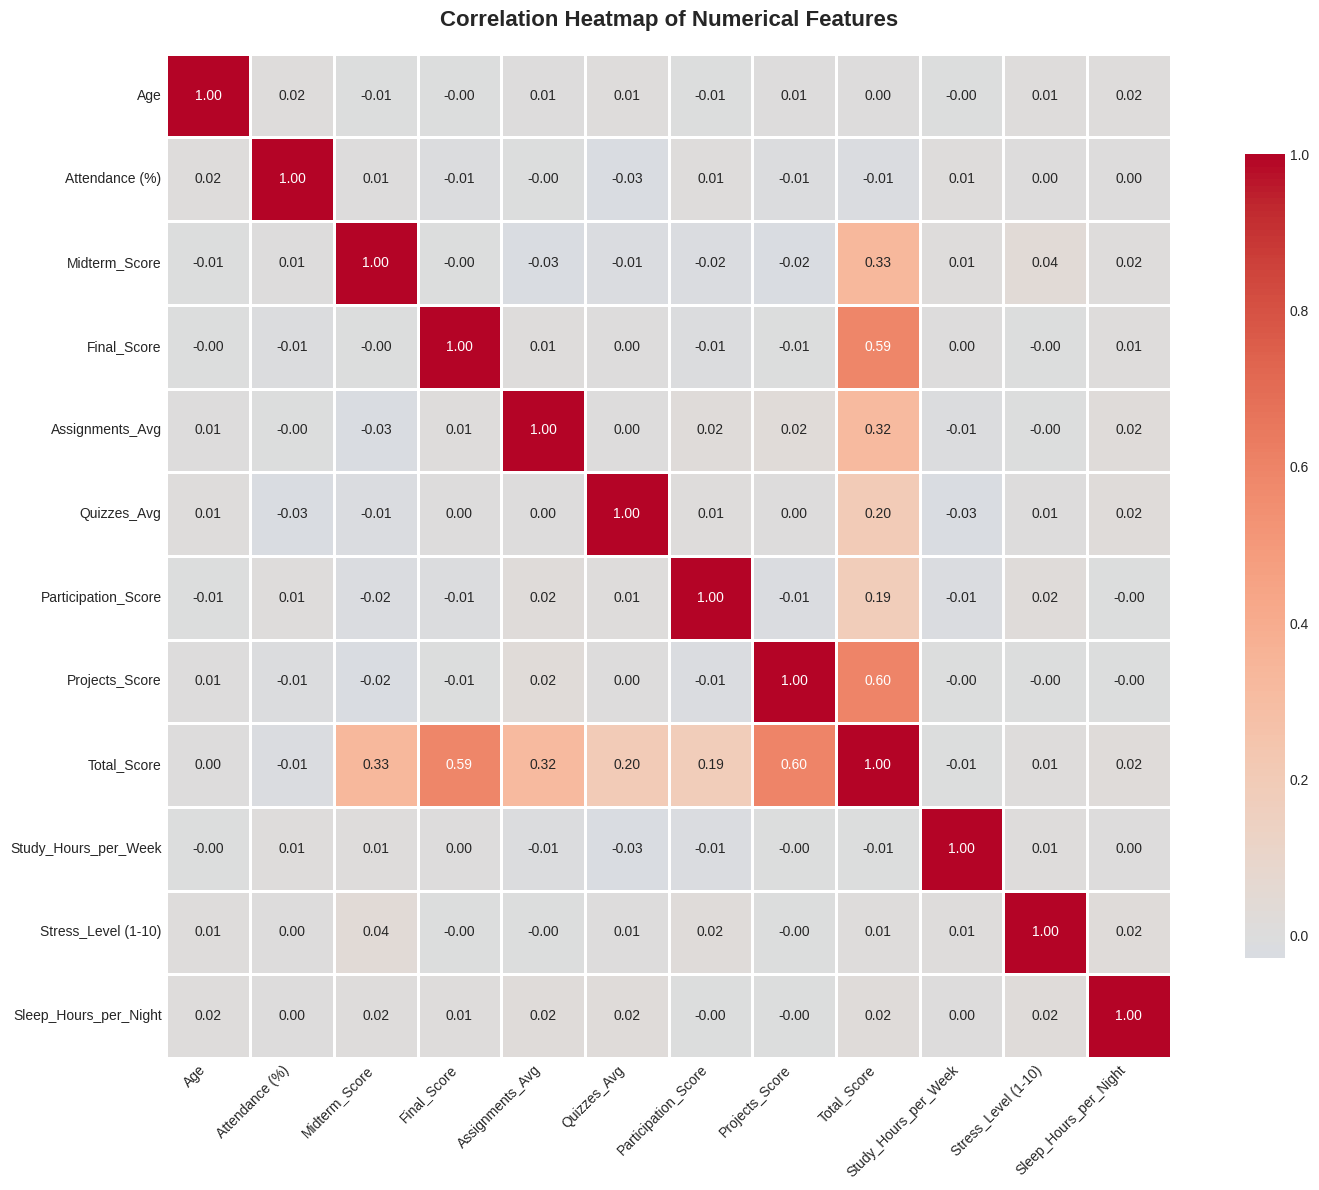

In [ ]:
# Create a correlation Heatmap function
def plot_correlation_heatmap(drop_feature):
  # Correlation heatmap for numerical features
  numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
  # Remove Student_ID as it's not a meaningful feature
  numerical_cols = [col for col in numerical_cols if col not in drop_feature]

  plt.figure(figsize=(16, 12))
  correlation_matrix = df[numerical_cols].corr()
  sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm',
              center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
  plt.title('Correlation Heatmap of Numerical Features', fontsize=16, fontweight='bold', pad=20)
  plt.xticks(rotation=45, ha='right')
  plt.yticks(rotation=0)
  plt.tight_layout()
  plt.show()

plot_correlation_heatmap(['Student_ID'])

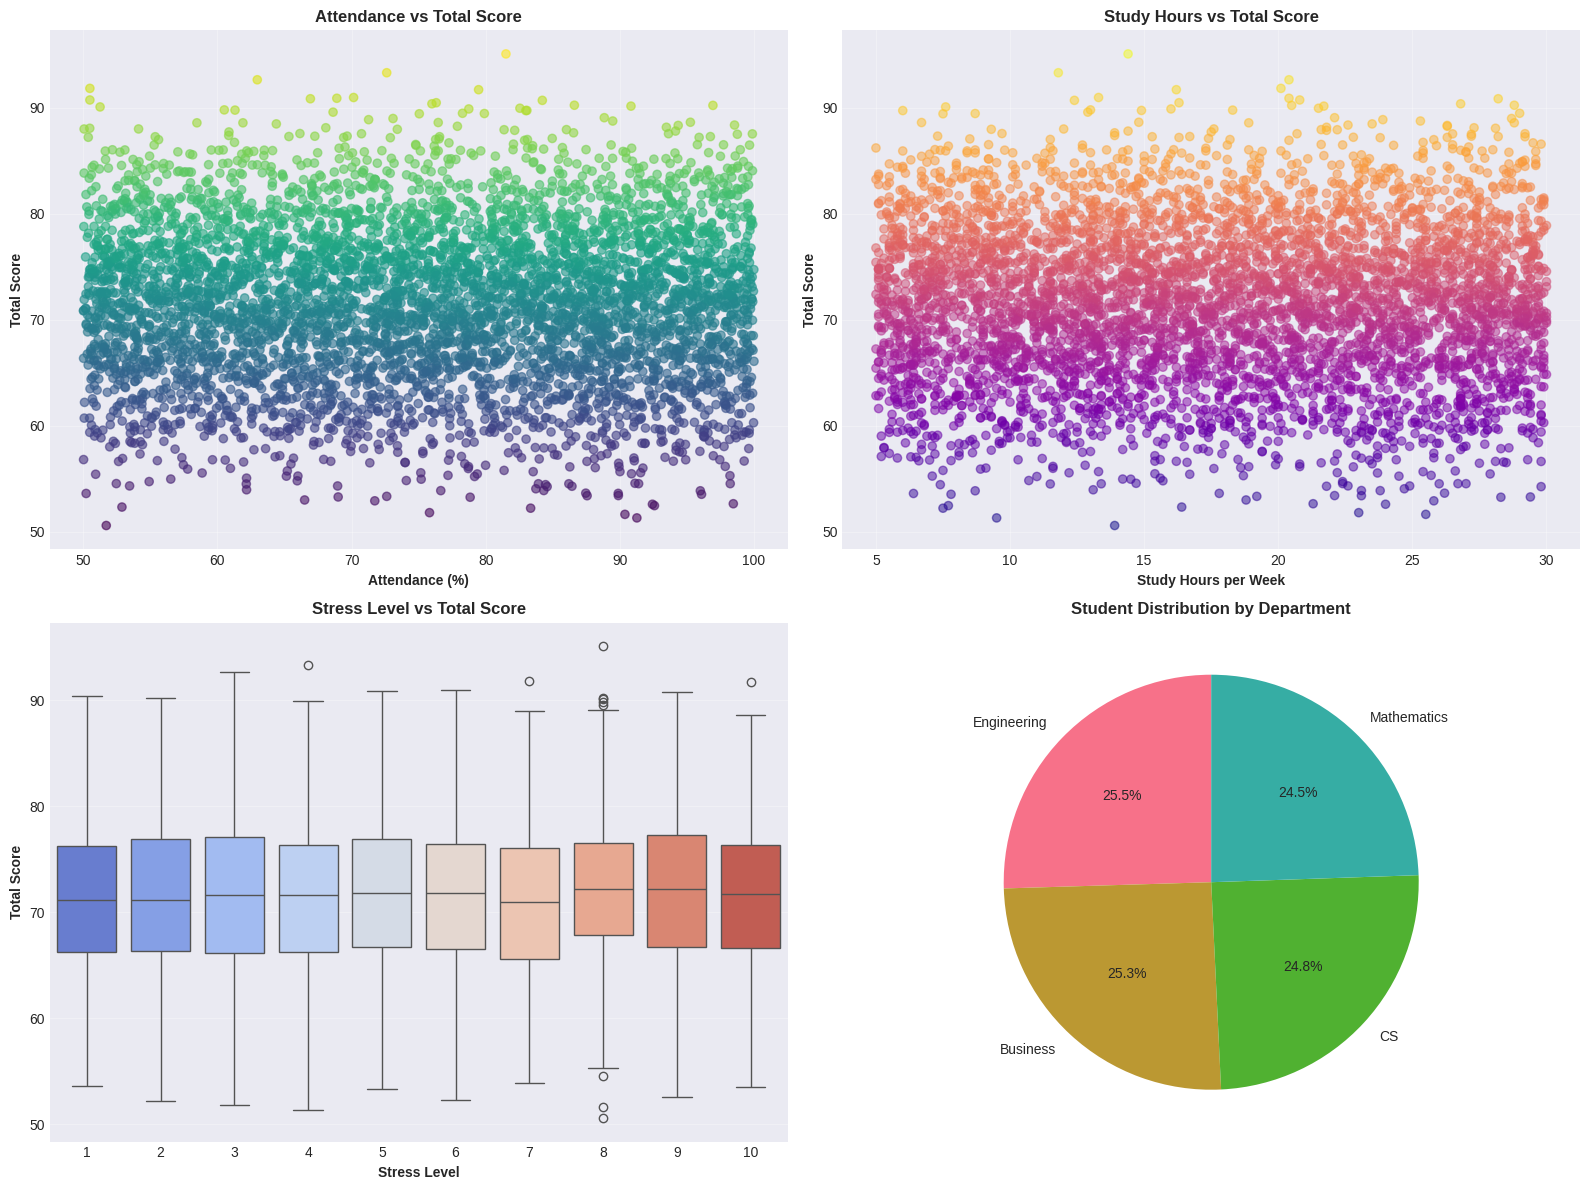

In [ ]:
# Explore relationship between key features and grades
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Attendance vs Total Score
axes[0, 0].scatter(df['Attendance (%)'], df['Total_Score'], alpha=0.6, c=df['Total_Score'], cmap='viridis')
axes[0, 0].set_xlabel('Attendance (%)', fontweight='bold')
axes[0, 0].set_ylabel('Total Score', fontweight='bold')
axes[0, 0].set_title('Attendance vs Total Score', fontweight='bold')
axes[0, 0].grid(alpha=0.3)

# Study Hours vs Total Score
axes[0, 1].scatter(df['Study_Hours_per_Week'], df['Total_Score'], alpha=0.5, c=df['Total_Score'], cmap='plasma')
axes[0, 1].set_xlabel('Study Hours per Week', fontweight='bold')
axes[0, 1].set_ylabel('Total Score', fontweight='bold')
axes[0, 1].set_title('Study Hours vs Total Score', fontweight='bold')
axes[0, 1].grid(alpha=0.3)

# Stress Level vs Total Score
sns.boxplot(data=df, x='Stress_Level (1-10)', y='Total_Score', ax=axes[1, 0], palette='coolwarm')
axes[1, 0].set_xlabel('Stress Level', fontweight='bold')
axes[1, 0].set_ylabel('Total Score', fontweight='bold')
axes[1, 0].set_title('Stress Level vs Total Score', fontweight='bold')
axes[1, 0].grid(axis='y', alpha=0.3)

# Department distribution
dept_counts = df['Department'].value_counts()
axes[1, 1].pie(dept_counts.values, labels=dept_counts.index, autopct='%1.1f%%', startangle=90)
axes[1, 1].set_title('Student Distribution by Department', fontweight='bold')

plt.tight_layout()
plt.show()

## 4. Data Preprocessing

In [ ]:
# Create a copy for preprocessing
df_processed = df.copy()

# Drop unnecessary columns
columns_to_drop = ['Student_ID', 'First_Name', 'Last_Name', 'Email']
df_processed = df_processed.drop(columns=columns_to_drop)

print("Columns after dropping unnecessary features:")
print(df_processed.columns.tolist())
print(f"\nDataset shape: {df_processed.shape}")

Columns after dropping unnecessary features:
['Gender', 'Age', 'Department', 'Attendance (%)', 'Midterm_Score', 'Final_Score', 'Assignments_Avg', 'Quizzes_Avg', 'Participation_Score', 'Projects_Score', 'Total_Score', 'Grade', 'Study_Hours_per_Week', 'Extracurricular_Activities', 'Internet_Access_at_Home', 'Parent_Education_Level', 'Family_Income_Level', 'Stress_Level (1-10)', 'Sleep_Hours_per_Night']

Dataset shape: (5000, 19)


### 📝 **Task 1: Encode Categorical Variables**

**Instructions:**
- Encode the categorical columns using `LabelEncoder`
- Store each encoder in the `label_encoders` dictionary
- Print the encoding mappings for each variable

**Categorical columns to encode:**
```python
categorical_columns = ['Gender', 'Department', 'Extracurricular_Activities',
                       'Internet_Access_at_Home', 'Parent_Education_Level', 'Family_Income_Level']
```

**Hint:** Use a loop to iterate through each column and apply `LabelEncoder()`

In [ ]:
# Define categorical columns
categorical_columns = [
    'Gender',
    'Department',
    'Extracurricular_Activities',
    'Internet_Access_at_Home',
    'Parent_Education_Level',
    'Family_Income_Level'
]

# Separate ordinal and nominal columns
ordinal_columns = categorical_columns[4:]
nominal_columns = categorical_columns[:-2]

# Define orders for ordinal categorical columns
education_order = ["Unknown", "High School", "Bachelor's", "Master's", "PhD"]
income_order = ['Low', 'Medium', 'High']

column_order_map = {
    ordinal_columns[0]: education_order,
    ordinal_columns[1]: income_order
}

# Nominal encoding using LabelEncoder
label_encoders = {}
for col in nominal_columns:
    le = LabelEncoder()
    df_processed[col] = le.fit_transform(df_processed[col])
    label_encoders[col] = dict(zip(le.classes_, le.transform(le.classes_)))

# Ordinal encoding using manual mapping
for col, order in column_order_map.items():
    mapping = {category: idx for idx, category in enumerate(order)}
    df_processed[col] = df_processed[col].map(mapping)
    label_encoders[col] = mapping

print("\n✅ Task 1 Complete! Categorical variables encoded successfully!")
print("="*80)
# ✅ Print all encoding mappings
for col, mapping in label_encoders.items():
    print(f"{col}: {mapping}")
print("\nDataset after encoding")
print("="*160)
df_processed.head()


✅ Task 1 Complete! Categorical variables encoded successfully!
Gender: {'Female': np.int64(0), 'Male': np.int64(1)}
Department: {'Business': np.int64(0), 'CS': np.int64(1), 'Engineering': np.int64(2), 'Mathematics': np.int64(3)}
Extracurricular_Activities: {'No': np.int64(0), 'Yes': np.int64(1)}
Internet_Access_at_Home: {'No': np.int64(0), 'Yes': np.int64(1)}
Parent_Education_Level: {'Unknown': 0, 'High School': 1, "Bachelor's": 2, "Master's": 3, 'PhD': 4}
Family_Income_Level: {'Low': 0, 'Medium': 1, 'High': 2}

Dataset after encoding


,Gender,Age,Department,Attendance (%),Midterm_Score,Final_Score,Assignments_Avg,Quizzes_Avg,Participation_Score,Projects_Score,Total_Score,Grade,Study_Hours_per_Week,Extracurricular_Activities,Internet_Access_at_Home,Parent_Education_Level,Family_Income_Level,Stress_Level (1-10),Sleep_Hours_per_Night
0,0,22,3,97.36,40.61,59.61,73.69,53.17,73.4,62.84,59.8865,F,10.3,1,0,3,1,1,5.9
1,1,18,0,97.71,57.27,74.00,74.23,98.23,88.0,98.23,81.9170,B,27.1,0,0,1,0,4,4.3
2,1,24,2,99.52,41.84,63.85,85.85,50.00,4.7,91.22,67.7170,D,12.4,1,0,1,0,9,6.1
3,0,24,2,90.38,45.65,44.44,68.10,66.27,4.2,55.48,51.6535,F,25.5,0,1,1,0,8,4.9
4,0,23,1,59.41,53.13,61.77,67.66,83.98,64.3,87.43,71.4030,C,13.3,1,0,3,1,6,4.5


### 📝 **Task 2: Encode the Target Variable (Grade)**

**Instructions:**
- Create a `LabelEncoder` for the target variable `'Grade'`
- Transform the Grade column and create a new column called `'Grade_Encoded'`
- Print the grade mapping and distribution

**Expected output:** Grade mapping showing A=0, B=1, C=2, D=3, F=4 (or similar)

In [ ]:
# YOUR CODE HERE
# TODO: Create a LabelEncoder for the Grade column
# TODO: Create a new column 'Grade_Encoded' with encoded values
# TODO: Print the grade mapping
# TODO: Print the distribution of encoded grades

# Example structure:
grade_encoder = LabelEncoder()
df_processed['Grade_Encoded'] = grade_encoder.fit_transform(df_processed['Grade'])
print("Unique classes and their encodings:")
for i, cls in enumerate(grade_encoder.classes_):
    print(f"{cls} = {i}")

print("\n✅ Task 2 Complete! Target variable encoded successfully!")

Unique classes and their encodings:
A = 0
B = 1
C = 2
D = 3
F = 4

✅ Task 2 Complete! Target variable encoded successfully!


## 5. Feature Selection and Data Preparation

We'll select the 5 most important features based on domain knowledge and correlation analysis:
1. **Final_Score** - Final exam performance
2. **Projects_Score** - Project grades
3. **Midterm_Score** - Midterm exam performance
4. **Assignments_Avg** - Average assignment scores
5. **Participation_Score** - Class participation

### 📝 **Task 3: Feature Selection**

**Instructions:**
- Select only the 5 most important features for prediction
- Create feature matrix `X` and target vector `y_classification`
- Display the selected features and matrix shapes

**Features to select:**
1. Final_Score
2. Projects_Score
3. Midterm_Score
4. Assignments_Avg
5. Participation_Score

**Why these features?** These are the strongest predictors based on correlation analysis and domain knowledge about what drives student performance.

In [ ]:
# YOUR CODE HERE
# TODO: Create a list called 'selected_features' with the 5 feature names
# TODO: Create X by selecting only these columns from df_processed
# TODO: Create y_classification from the 'Grade_Encoded' column
# TODO: Print the selected features
# TODO: Print the shapes of X and y_classification

selected_features = ["Final_Score", "Projects_Score", "Midterm_Score", "Assignments_Avg", "Participation_Score"]

def select_features():
  X = df_processed[selected_features]
  y_classification = df_processed['Grade_Encoded']
  return X, y_classification

def selected_features_info(X, y_classification):
  X, y_classification = select_features()
  print(f"Selected Features: {selected_features}")
  print(f"Shape of X: {X.shape}")
  print(f"Shape of y_classification: {y_classification.shape}")

X, y_classification = select_features()
selected_features_info(X, y_classification)
print("\n✅ Task 3 Complete! Features selected successfully!")

Selected Features: ['Final_Score', 'Projects_Score', 'Midterm_Score', 'Assignments_Avg', 'Participation_Score']
Shape of X: (5000, 5)
Shape of y_classification: (5000,)

✅ Task 3 Complete! Features selected successfully!


### 📝 **Task 4: Train-Test Split**

**Instructions:**
- Split the data into training (80%) and testing (20%) sets
- Use `train_test_split` from sklearn
- Set `random_state=42` for reproducibility
- Use `stratify` parameter to maintain grade distribution
- Store results in: `X_train`, `X_test`, `y_train`, `y_test`
- Print the split summary

**Important:** Stratification ensures each grade category is proportionally represented in both sets!

In [ ]:
# YOUR CODE HERE
# TODO: Use train_test_split to split X and y_classification
# TODO: Set test_size=0.2, random_state=42, stratify=y_classification
# TODO: Store results in X_train, X_test, y_train, y_test
# TODO: Print summary statistics

X_train, X_test, y_train, y_test = train_test_split(X, y_classification, test_size=0.2, random_state=42, stratify=y_classification)

def get_statistical_summary(X_train, X_test, y_train, y_test):
    print("Train/Test Split Summary:")
    print(f"X_train shape: {X_train.shape}")
    print(f"X_test shape: {X_test.shape}")
    print(f"y_train shape: {y_train.shape}")
    print(f"y_test shape: {y_test.shape}")

    print("\nClass Distribution in y_train:")
    print(pd.Series(y_train).value_counts().sort_index())

    print("\nClass Distribution in y_test:")
    print(pd.Series(y_test).value_counts().sort_index())

get_statistical_summary(X_train, X_test, y_train, y_test)
print("\n✅ Task 4 Complete! Data split successfully!")

Train/Test Split Summary:
X_train shape: (4000, 5)
X_test shape: (1000, 5)
y_train shape: (4000,)
y_test shape: (1000,)

Class Distribution in y_train:
Grade_Encoded
0      13
1     510
2    1846
3    1408
4     223
Name: count, dtype: int64

Class Distribution in y_test:
Grade_Encoded
0      3
1    128
2    461
3    352
4     56
Name: count, dtype: int64

✅ Task 4 Complete! Data split successfully!


### 📝 **Task 5: Feature Scaling**

**Instructions:**
- Create a `StandardScaler` object
- Fit the scaler on training data and transform both train and test sets
- Store scaled data in `X_train_scaled` and `X_test_scaled`
- Print the shapes to verify

**Why scale?** Logistic regression performs better when features are on the same scale. StandardScaler standardizes features by removing the mean and scaling to unit variance.

**Important:** Always fit the scaler only on training data to avoid data leakage!

In [ ]:
# YOUR CODE HERE
# TODO: Create a StandardScaler object
# TODO: Fit the scaler on X_train and transform it
# TODO: Transform X_test (without fitting!)
# TODO: Store results in X_train_scaled and X_test_scaled
# TODO: Print the shapes

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Scaled Data Shapes:")
print(f"X_train_scaled shape: {X_train_scaled.shape}")
print(f"X_test_scaled shape: {X_test_scaled.shape}")

print("\n✅ Task 5 Complete! Features scaled successfully!")

Scaled Data Shapes:
X_train_scaled shape: (4000, 5)
X_test_scaled shape: (1000, 5)

✅ Task 5 Complete! Features scaled successfully!


## 6. Logistic Regression Model - Predicting Grade Category

### 📝 **Task 6: Create and Train Logistic Regression Model**

**Instructions:**
- Import `LogisticRegression` from sklearn
- Create a LogisticRegression model with these parameters:
  - `max_iter=1000` (to ensure convergence)
  - `random_state=42` (for reproducibility)
  - `multi_class='multinomial'` (for multi-class classification)
  - `solver='lbfgs'` (optimization algorithm)
- Train the model on scaled training data
- Make predictions on the test set
- Calculate and print the accuracy

**Note:** This is a multi-class classification problem (5 grades: A, B, C, D, F)

In [ ]:
# YOUR CODE HERE
# TODO: Create a LogisticRegression model with the specified parameters
# TODO: Train (fit) the model on X_train_scaled and y_train
# TODO: Make predictions on X_test_scaled
# TODO: Calculate accuracy using accuracy_score
# TODO: Print training complete message and accuracy

model = LogisticRegression(max_iter=1000, random_state=42,
                              multi_class='multinomial', solver='lbfgs')
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)

print("Training complete!")
print(f"Test Accuracy: {accuracy:.4f} ({accuracy:.1%})")

print("\n✅ Task 6 Complete! Model trained successfully!")

Training complete!
Test Accuracy: 0.8680 (86.8%)

✅ Task 6 Complete! Model trained successfully!


### 📝 **Task 7: Model Evaluation - Classification Report**

**Instructions:**
- Generate a detailed classification report
- Use `classification_report` from sklearn.metrics
- Include target names (grade labels) for better readability
- Print the report

**The report will show:**
- **Precision**: How many predicted grades were correct
- **Recall**: How many actual grades were correctly identified
- **F1-score**: Harmonic mean of precision and recall
- **Support**: Number of samples in each class

In [ ]:
# YOUR CODE HERE
# TODO: Generate and print a classification report
# TODO: Use grade_encoder.classes_ as target_names
# TODO: Set zero_division=0 to handle cases with no predictions

def get_classification_report():
  report = classification_report(y_test, y_pred, target_names=grade_encoder.classes_, zero_division=0)
  print("Classification Report:")
  print("="*80)
  print(report)

get_classification_report()
print("\n✅ Task 7 Complete! Classification report generated!")

Classification Report:
              precision    recall  f1-score   support

           A       0.00      0.00      0.00         3
           B       0.86      0.82      0.84       128
           C       0.86      0.91      0.89       461
           D       0.88      0.86      0.87       352
           F       0.87      0.71      0.78        56

    accuracy                           0.87      1000
   macro avg       0.69      0.66      0.68      1000
weighted avg       0.87      0.87      0.87      1000


✅ Task 7 Complete! Classification report generated!


### 📝 **Task 8: Create Confusion Matrix Visualization**

**Instructions:**
- Create a confusion matrix using `confusion_matrix` from sklearn
- Visualize it as a heatmap using seaborn
- Label axes with actual grade names
- Add title and labels

**Confusion Matrix shows:**
- Rows: Actual grades
- Columns: Predicted grades  
- Diagonal: Correct predictions
- Off-diagonal: Misclassifications

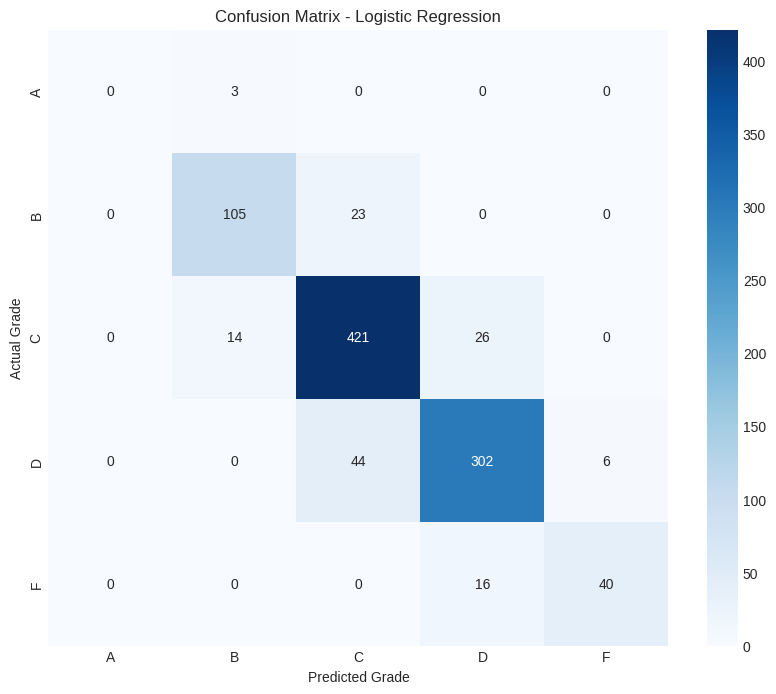


✅ Task 8 Complete! Confusion matrix created!


In [ ]:
# YOUR CODE HERE
# TODO: Create confusion matrix using confusion_matrix(y_test, y_pred)
# TODO: Create a figure of size (10, 8)
# TODO: Plot heatmap with sns.heatmap()
# TODO: Set annot=True, fmt='d', cmap='Blues'
# TODO: Use grade_encoder.classes_ for x and y tick labels
# TODO: Add title, xlabel, ylabel
# TODO: Show the plot

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=grade_encoder.classes_,
            yticklabels=grade_encoder.classes_)
plt.title('Confusion Matrix - Logistic Regression')
plt.ylabel('Actual Grade')
plt.xlabel('Predicted Grade')
plt.show()



print("\n✅ Task 8 Complete! Confusion matrix created!")

## 🌟 Bonus Tasks (Optional - Extra Credit)

Complete these additional tasks to deepen your understanding:

### 📝 **Bonus Task 1: Cross-Validation**

**Instructions:**
- Perform 5-fold cross-validation on the training data
- Use `cross_val_score` from sklearn
- Print individual fold scores, mean, and standard deviation
- Calculate 95% confidence interval

**Why cross-validation?** It gives a more robust estimate of model performance by testing on different subsets of data.

In [ ]:

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=cv, scoring='accuracy')
mean_score = cv_scores.mean()
std_score = cv_scores.std()

print("Cross-Validation Scores:")
print(f"CV Scores: {cv_scores}")
print(f"Mean: {mean_score:.4f}")
print(f"Std: {std_score:.4f}")

confidence_level = 0.95
# Compute 95% confidence interval
def calculate_z_score(confidence_level):
    alpha = 1 - confidence_level
    z = norm.ppf(1 - alpha / 2)
    return z

def calculate_confidence_interval(mean, std, n, z):
    margin_of_error = z * (std / np.sqrt(n))
    lower_bound = mean - margin_of_error
    upper_bound = mean + margin_of_error
    print(f"95% Confidence Interval: [{lower_bound:.4f}, {upper_bound:.4f}]")

z = calculate_z_score(confidence_level)
calculate_confidence_interval(mean_score, std_score, len(cv_scores), z)




Cross-Validation Scores:
CV Scores: [0.87375 0.875   0.86    0.88    0.87125]
Mean: 0.8720
Std: 0.0066
95% Confidence Interval: [0.8662, 0.8778]


### 📝 **Bonus Task 2: Analyze Model Coefficients**

**Instructions:**
- Extract and display the model coefficients
- Create a DataFrame showing coefficients for each feature and grade
- Interpret what the coefficients mean

**Coefficient interpretation:**
- Positive coefficient → Feature increases likelihood of that grade
- Negative coefficient → Feature decreases likelihood of that grade
- Larger magnitude → Stronger influence

In [ ]:

coef_df = pd.DataFrame(
    model.coef_,
    columns=selected_features,
    index=grade_encoder.classes_
)
print(coef_df.round(4))



   Final_Score  Projects_Score  Midterm_Score  Assignments_Avg  \
A       5.3580          5.1007         3.5257           2.8999   
B       4.4006          4.7617         2.6612           2.2936   
C       0.6869          0.6661         0.3528           0.2241   
D      -3.5816         -3.4876        -2.1767          -1.9149   
F      -6.8639         -7.0409        -4.3630          -3.5027   

   Participation_Score  
A               2.3283  
B               1.4726  
C               0.1320  
D              -1.3956  
F              -2.5373  


## 📝 Reflection Questions

Answer the following questions in markdown cells below:

### Question 1: Model Performance
**Q:** What accuracy did your logistic regression model achieve? Do you consider this good performance? Why or why not?

**Your Answer:**
<!-- Write your answer here -->


---

### Question 2: Feature Importance
**Q:** Based on the confusion matrix, which grade category is the model best at predicting? Which grade is it worst at predicting? Why might this be?

**Your Answer:**
<!-- Write your answer here -->


---

### Question 3: Data Preprocessing
**Q:** Why is it important to scale features before training a logistic regression model? What would happen if we didn't scale?

**Your Answer:**
<!-- Write your answer here -->


---

### Question 4: Train-Test Split
**Q:** Why did we use stratification when splitting the data? What problem does it solve?

**Your Answer:**
<!-- Write your answer here -->


---

### Question 5: Real-World Application
**Q:** How could this grade prediction model be used in a real educational setting? What are some potential benefits and concerns?

**Your Answer:**
<!-- Write your answer here -->

### 📝 **Bonus Task 3: Save Your Model**

**Instructions:**
- Save your trained model using joblib
- Save the scaler and encoders as well
- This allows you to use the model later without retraining

In [ ]:
import joblib
joblib.dump(model, 'logistic_regression_model.joblib')
joblib.dump(scaler, 'feature_scaler.joblib')
joblib.dump(grade_encoder, 'grade_encoder.joblib')
joblib.dump(selected_features, 'selected_features.joblib')

['selected_features.joblib']

## 🎯 Submission Checklist

Before submitting your assignment, make sure you have completed:

- [ ] **Task 1:** Encoded categorical variables
- [ ] **Task 2:** Encoded target variable (Grade)
- [ ] **Task 3:** Selected 5 most important features
- [ ] **Task 4:** Split data into train/test sets (80/20)
- [ ] **Task 5:** Scaled features using StandardScaler
- [ ] **Task 6:** Created and trained Logistic Regression model
- [ ] **Task 7:** Generated classification report
- [ ] **Task 8:** Created confusion matrix visualization
- [ ] **Reflection Questions:** Answered all 5 questions
- [ ] **Bonus Tasks (Optional):** Completed any bonus tasks
- [ ] **Code Quality:** All cells run without errors
- [ ] **Documentation:** Added comments to explain your code

---

## 📚 Resources

- [Scikit-learn Documentation](https://scikit-learn.org/stable/)
- [Logistic Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
- [Model Evaluation Metrics](https://scikit-learn.org/stable/modules/model_evaluation.html)

---

## 🎓 Grading Rubric

| Component | Points |
|-----------|--------|
| Task 1-8 Completion | 80 points |
| Code Quality & Documentation | 10 points |
| Reflection Questions | 10 points |
| **Bonus Tasks** | +15 points extra credit |
| **Total** | 100 points (+15 bonus) |

---

**Good luck with your assignment! 🚀**